In [157]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import quad
from statsmodels.distributions.empirical_distribution import ECDF

In [352]:
n=250
bins=int(np.sqrt(n)/3)
step=1/bins
A=0
B=2

In [353]:
def f(x, a, b):
    if x>=a and x<=b:
        return 1/(b-a)
    else:
        return 0

In [381]:
D_arr=np.array([])
for i in range(0, 10000):
    _uniform=np.random.uniform(A, B, n)
    _hist, _bin_edges=(np.histogram(_uniform, bins))
    _hist_normed=_hist/(n/bins)/(B-A)
    result=np.array([])
    squares=np.array([])
    #for i in np.linspace(A, B-step, bins):
    for i in range(0, 5):
        #print(np.around(i, decimals=1))
        result = np.append(result, np.around((quad(f, A+i/bins, A+i/bins+step, args=(A, B)))[0],decimals=1))
        squares = np.append(squares, _hist_normed[i]*(_bin_edges[i+1]-_bin_edges[i]))

    result=np.abs(squares-result)
    D=max(result)
    D_arr=np.append(D_arr, D)

[0.15113645]
[0.15862801]


(array([3.000e+00, 4.900e+01, 1.680e+02, 4.470e+02, 7.550e+02, 9.310e+02,
        1.161e+03, 1.021e+03, 9.700e+02, 9.340e+02, 8.350e+02, 6.430e+02,
        5.380e+02, 4.010e+02, 3.170e+02, 2.740e+02, 1.450e+02, 1.440e+02,
        1.000e+02, 5.800e+01, 3.800e+01, 2.400e+01, 1.800e+01, 1.500e+01,
        3.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.09705542, 0.10084528, 0.10463514, 0.10842501, 0.11221487,
        0.11600474, 0.1197946 , 0.12358447, 0.12737433, 0.13116419,
        0.13495406, 0.13874392, 0.14253379, 0.14632365, 0.15011352,
        0.15390338, 0.15769324, 0.16148311, 0.16527297, 0.16906284,
        0.1728527 , 0.17664257, 0.18043243, 0.18422229, 0.18801216,
        0.19180202, 0.19559189, 0.19938175, 0.20317162, 0.20696148,
        0.21075134, 0.21454121, 0.21833107, 0.22212094]),
 <a list of 33 Patch objects>)

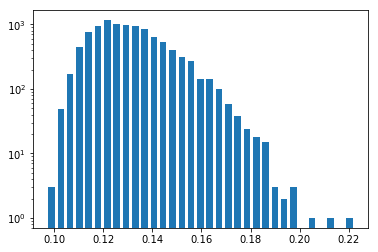

In [383]:
#D=max(result)
#print(D)
#print(result)
ecdfD=ECDF(D_arr)
#plt.plot(ecdfD.x, ecdfD.y, '.')
quan09=(ecdfD.x[abs(ecdfD.y-0.90)<=0.0000001])
quan095=(ecdfD.x[abs(ecdfD.y-0.95)<=0.0000001])
print(quan09)
print(quan095)
plt.hist(D_arr, int(np.sqrt(len(D_arr))/3), rwidth=0.7, log=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


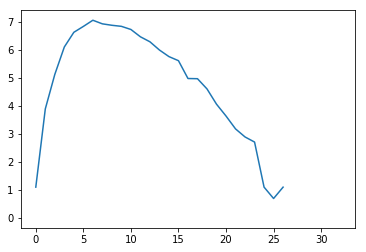

In [389]:
_prov = np.histogram(D_arr, int(np.sqrt(len(D_arr))/3))
plt.plot(np.log(_prov[0]))
#D_arr2=D_arr**2
#D_arr2=np.exp(D_arr2)
#plt.hist(D_arr2, int(np.sqrt(len(D_arr))/3), rwidth=0.7)

In [356]:
_uniform=np.random.uniform(A, B, n)
_hist, _bin_edges=(np.histogram(_uniform, bins))
_hist_normed=_hist/(n/bins)/(B-A)
result=np.array([])
squares=np.array([])
#for i in np.linspace(A, B-step, bins):
    #print(np.around(i, decimals=1))
#    result = np.append(result, np.around((quad(f, i, i+step, args=(A, B)))[0],decimals=1))
#    squares = np.append(squares, _hist_normed[int(i*bins)]*(_bin_edges[int(i*bins)+1]-_bin_edges[int(i*bins)]))
for i in range(0, 5):
        #print(np.around(i, decimals=1))
    result = np.append(result, np.around((quad(f, A+i/bins, A+i/bins+step, args=(A, B)))[0],decimals=1))
    squares = np.append(squares, _hist_normed[i]*(_bin_edges[i+1]-_bin_edges[i]))

result=np.abs(squares-result)
D=max(result)
print(D)

0.12147169616305892


In [357]:
if D>quan09:
    print("false")
else:
    print("true")

true


In [358]:
if D>quan095:
    print("false")
else:
    print("true")

true


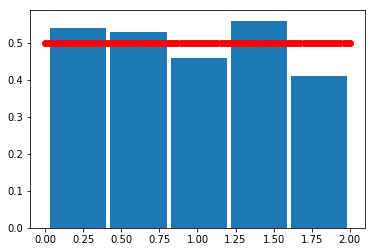

In [360]:
#plt.plot(np.linspace(0, 1-step, bins), result, 'o')
bin_centers=np.array([])
for i in range(len(_bin_edges)-1):
    bin_centers=np.append(bin_centers, (_bin_edges[i+1]+_bin_edges[i])/2)
plt.bar(bin_centers, _hist_normed, width=(B-A)/bins-0.03)
lin=np.linspace(A, B, 100)
ff= [f(i, A, B) for i in lin]
plt.plot(lin, ff, 'ro')
plt.show()

In [330]:
Ex=sum(_uniform)/n

In [331]:
Ex

0.48129392935940185